 # Predicción de Series Temporales
 ## HHM-RC

In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r",encoding="utf-8").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: 'style.css'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

In [5]:
# Importamos la libreria de gráficos Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 3)})

# Cambio de Régimen HHM en el IBEX

In [6]:
#
RISKY_ASSET = '^IBEX'
START_DATE = '2010-01-01'
END_DATE = '2021-09-30'

##  Usamos Datos de Yahoo

In [7]:
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 3003 rows of data.


## Calculamos los datos semanales

In [10]:
# Rentabilidad 
y = asset_df['Adj Close'].resample('W-FRI') \
                            .last()

## Calculamos la rentabilidad Logarítmica

In [11]:
#
y_week= (np.log(y) - np.log(y.shift(1))).dropna()
y_week.tail()

Date
2021-09-03   -0.006544
2021-09-10   -0.019216
2021-09-17    0.007516
2021-09-24    0.012725
2021-10-01    0.000710
Freq: W-FRI, Name: Adj Close, dtype: float64

## Graficamos los datos de Precios Semanales

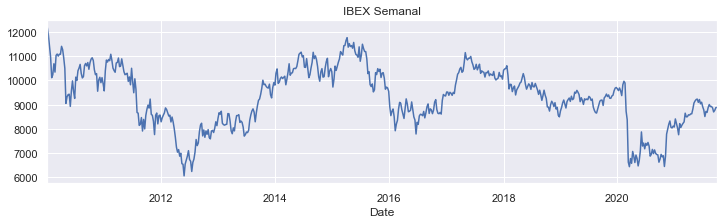

In [12]:
# Plot the data
y.plot(title="IBEX Semanal", figsize=(12, 3));

## Graficamos los datos de Rentabilidad Semanales

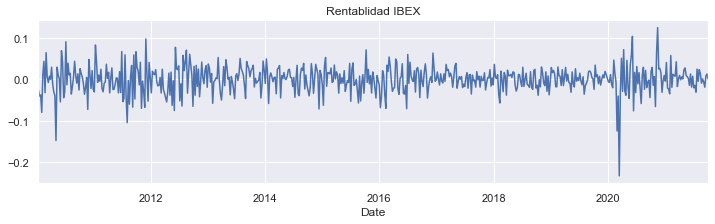

In [13]:
#
y_week.plot(title="Rentablidad IBEX", figsize=(12, 3));

# Especifiación y Estimación del modelo HHM
## Medias
## Varianzas

In [16]:
#
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
# 2 régimenes. También le digo que tenga diferente varianza del error para cada uno de los estados
# trend="c" si quieres poner constante. Si no quieres constante pones "n"
mod_ibex = sm.tsa.MarkovRegression(y_week, k_regimes=2,trend='c',switching_variance=True)
res_ibex = mod_ibex.fit()

## Resultado del Modelo

In [19]:
res_ibex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  612
Model:               MarkovRegression   Log Likelihood                1288.594
Date:                Mon, 22 Nov 2021   AIC                          -2565.188
Time:                        19:58:40   BIC                          -2538.688
Sample:                    01-15-2010   HQIC                         -2554.881
                         - 10-01-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      0.825      0.409      -0.001       0.003
sigma2         0.0005   5.23e-05      9.551      0.000       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0042      0.004     -1.101      0.271      -0.012       0.003
sigma2         0.0024      0.000      6.170      0.000       0.002       0.003
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9749      0.011     89.054      0.000       0.953       0.996
p[1->0]        0.0617      0.029      2.129      0.033       0.005       0.119
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [ ]:
# por ahora no sabemos qué significa el 1 y qué significa el 0
# he especificado que las varianzas son diferentes y vemos que son significativas.
# 

## Probabilidades del Estado 0 (rentabilidad positiva)

<AxesSubplot:title={'center':'Probability of being in the low regime'}, xlabel='Date'>

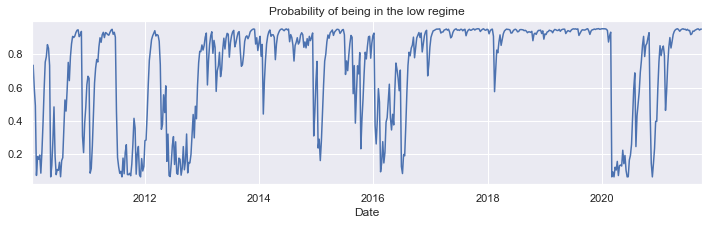

In [13]:
# ponemos 0 diciendo que visualizamos lo del estado 0
res_ibex.predicted_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)

## Probabilidades Suavizadas del Estado 0 (rentabilidad positiva)

<AxesSubplot:title={'center':'Probability of being in the low regime'}, xlabel='Date'>

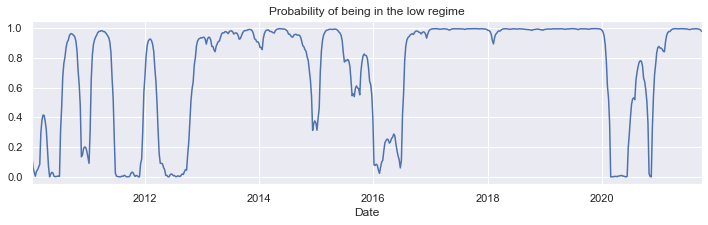

In [14]:
res_ibex.smoothed_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)
# esto nos muestra cuál es la probabilidad de estar en el estado 0

## Probabilidades del Estado 1 (rentabilidad negativa)

<AxesSubplot:title={'center':'Probability of being in the high regime'}, xlabel='Date'>

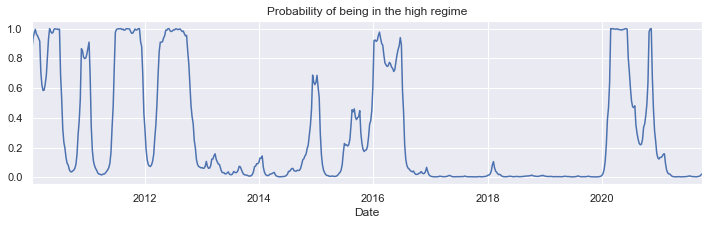

In [20]:
res_ibex.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", figsize=(12, 3)
)

## Matriz de Transicciones

In [21]:
print(res_ibex.regime_transition)
# esto nos muestra las probabilidades.

[[[0.97488403]
  [0.06170359]]

 [[0.02511597]
  [0.93829641]]]


## Resumen del Modelo

In [22]:
sns.set(rc={'figure.figsize':(12, 12)})

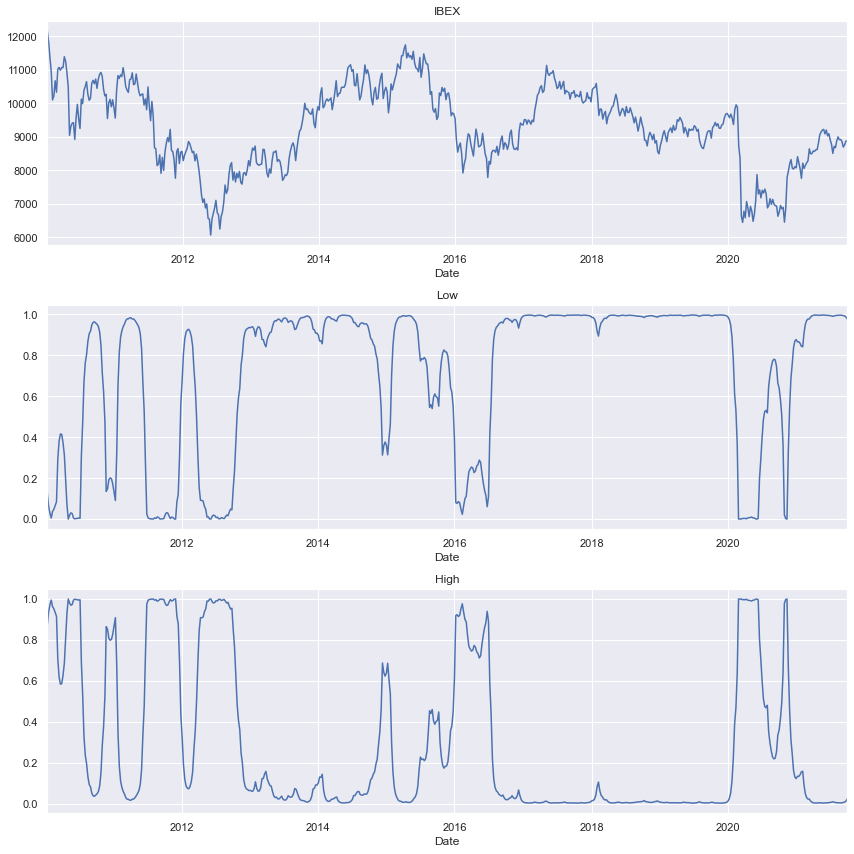

In [24]:
#
fig, axes = plt.subplots(nrows=3, ncols=1)
y.plot(ax=axes[0],title="IBEX")
res_ibex.smoothed_marginal_probabilities[0].plot(ax=axes[1],title="Low")
res_ibex.smoothed_marginal_probabilities[1].plot(ax=axes[2],title="High")
fig.tight_layout(pad=1.0)

In [25]:
## probemos ahora con 3 estados

In [26]:
#
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
# 2 régimenes. También le digo que tenga diferente varianza del error para cada uno de los estados
# trend="c" si quieres poner constante. Si no quieres constante pones "n"
mod_ibex_2 = sm.tsa.MarkovRegression(y_week, k_regimes=3,trend='c',switching_variance=True)
res_ibex_2 = mod_ibex_2.fit()

## Resultado del Modelo

In [27]:
res_ibex_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  612
Model:               MarkovRegression   Log Likelihood                1293.206
Date:                Mon, 22 Nov 2021   AIC                          -2562.412
Time:                        20:06:21   BIC                          -2509.411
Sample:                    01-15-2010   HQIC                         -2541.798
                         - 10-01-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0137      0.003      3.977      0.000       0.007       0.020
sigma2         0.0002   7.06e-05      2.337      0.019    2.66e-05       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0035      0.002     -1.742      0.081      -0.007       0.000
sigma2         0.0006   7.71e-05      7.233      0.000       0.000       0.001
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.004     -0.917      0.359      -0.012       0.004
sigma2         0.0025      0.000      6.412      0.000       0.002       0.003
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     4.109e-09        nan        nan        nan         nan         nan
p[1->0]        0.2859      0.126      2.260      0.024       0.038       0.534
p[2->0]        0.0693      0.031      2.223      0.026       0.008       0.130
p[0->1]        1.0000        nan        nan        nan         nan         nan
p[1->1]        0.6815      0.130      5.251      0.000       0.427       0.936
p[2->1]      9.78e-11        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [ ]:
# por ahora no sabemos qué significa el 1 y qué significa el 0
# he especificado que las varianzas son diferentes y vemos que son significativas.
# 

## Probabilidades del Estado 0 (rentabilidad positiva)

<AxesSubplot:title={'center':'Probability of being in the low regime'}, xlabel='Date'>

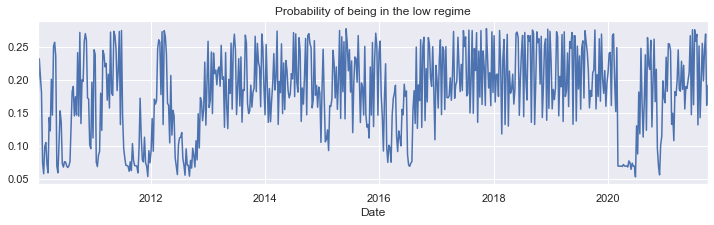

In [28]:
# ponemos 0 diciendo que visualizamos lo del estado 0
res_ibex_2.predicted_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)

## Probabilidades Suavizadas del Estado 0 (rentabilidad positiva)

<AxesSubplot:title={'center':'Probability of being in the low regime'}, xlabel='Date'>

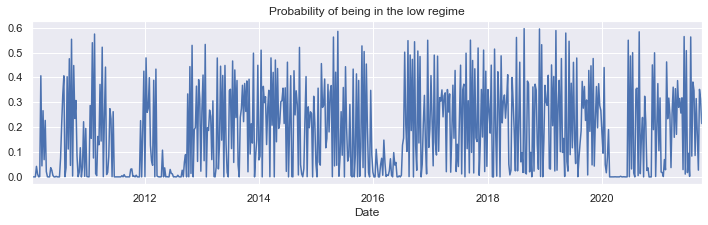

In [29]:
res_ibex_2.smoothed_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)
# esto nos muestra cuál es la probabilidad de estar en el estado 0

## Probabilidades del Estado 1 (rentabilidad negativa)

<AxesSubplot:title={'center':'Probability of being in the high regime'}, xlabel='Date'>

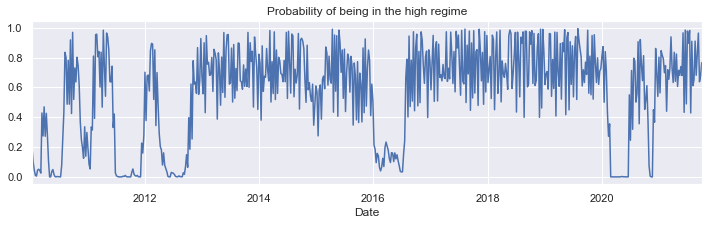

In [36]:
res_ibex_2.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", figsize=(12, 3)
)

<AxesSubplot:title={'center':'Probability of being in the high regime'}, xlabel='Date'>

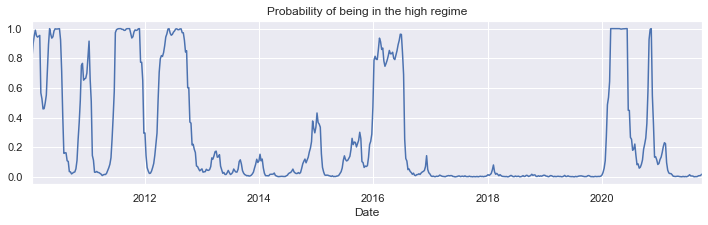

In [37]:
res_ibex_2.smoothed_marginal_probabilities[2].plot(
    title="Probability of being in the high regime", figsize=(12, 3)
)

## Matriz de Transicciones

In [31]:
print(res_ibex_2.regime_transition)
# esto nos muestra las probabilidades.

[[[4.10886234e-09]
  [2.85923441e-01]
  [6.92774923e-02]]

 [[9.99999996e-01]
  [6.81502546e-01]
  [9.78038621e-11]]

 [[8.10240763e-13]
  [3.25740124e-02]
  [9.30722508e-01]]]


## Resumen del Modelo

In [22]:
sns.set(rc={'figure.figsize':(12, 12)})

KeyError: 3

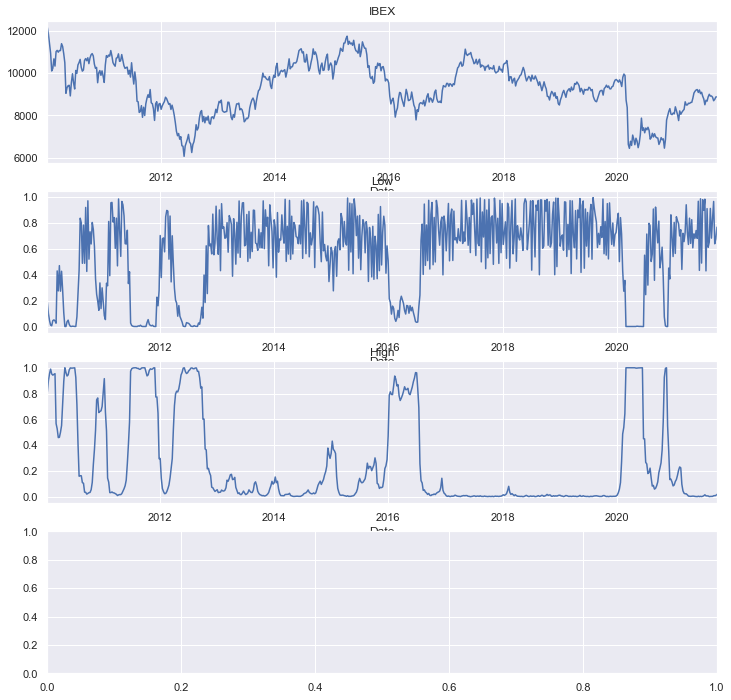

In [38]:
#
fig, axes = plt.subplots(nrows=4, ncols=1)
y.plot(ax=axes[0],title="IBEX")
res_ibex_2.smoothed_marginal_probabilities[1].plot(ax=axes[1],title="Low")
res_ibex_2.smoothed_marginal_probabilities[2].plot(ax=axes[2],title="High")
res_ibex_2.smoothed_marginal_probabilities[3].plot(ax=axes[3],title="High")
fig.tight_layout(pad=1.0)

# Modelo HHM para KO
## Lectura de Datos

In [39]:
# Read Data

ko_df = pd.read_csv('data/04/ko.csv',sep=';')
ko_df['Fecha'] = pd.to_datetime(ko_df['Fecha'],format="%Y%m%d")
ko_df = ko_df.set_index('Fecha')
ko_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/04/ko.csv'

## Tasa de Variacion Anual de las Ventas de KO

In [40]:
# como son datos trimestrales, le quito 4 y me quedo con el mismo trimestre del año anterior
ko_ts_q=ko_df['Ingresos'].astype('float64').to_period('Q').sort_index()
ko_logret= (np.log(ko_ts_q) - np.log(ko_ts_q.shift(4))).dropna()
ko_logret.tail()

NameError: name 'ko_df' is not defined

## Especificación y Estimación del Modelo

In [21]:
# (a switching mean is the default of the MarkovRegession model)
mod_ko = sm.tsa.MarkovRegression(ko_logret, k_regimes=2,trend='c',switching_variance=True)
res_ko = mod_ko.fit()

In [22]:
res_ko.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:               Ingresos   No. Observations:                  118
Model:               MarkovRegression   Log Likelihood                 106.838
Date:                Mon, 22 Nov 2021   AIC                           -201.677
Time:                        06:25:12   BIC                           -185.053
Sample:                    03-31-1992   HQIC                          -194.927
                         - 06-30-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0333      0.013      2.501      0.012       0.007       0.059
sigma2         0.0033      0.001      3.545      0.000       0.001       0.005
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0484      0.031      1.560      0.119      -0.012       0.109
sigma2         0.0283      0.009      3.183      0.001       0.011       0.046
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9059      0.044     20.612      0.000       0.820       0.992
p[1->0]        0.1484      0.086      1.735      0.083      -0.019       0.316
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

## Resultados

<AxesSubplot:xlabel='Fecha'>

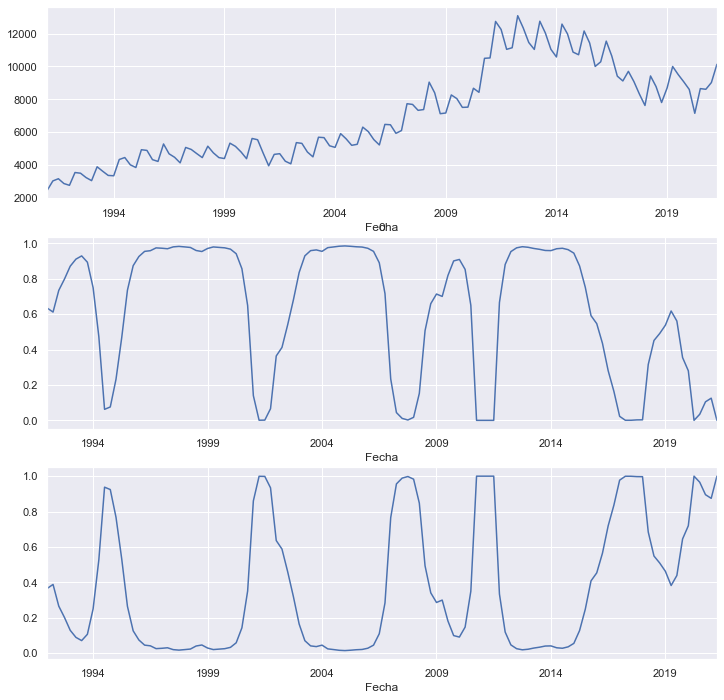

In [23]:
sns.set(rc={'figure.figsize':(12, 12)})
fig, axes = plt.subplots(nrows=3, ncols=1)
ko_ts_q.plot(ax=axes[0])
res_ko.smoothed_marginal_probabilities[0].plot(ax=axes[1],title="0")
res_ko.smoothed_marginal_probabilities[1].plot(ax=axes[2])